In [5]:
import torch
import matplotlib.pyplot as plt

In [2]:
x = torch.randn(5, 10)
y = torch.randint(0,10,(5,))

In [3]:
x

tensor([[-0.3495, -0.7411, -0.5763,  0.7485,  1.0878, -0.0959, -0.5294, -2.1013,
          0.2809, -1.7440],
        [-0.4862, -1.2133, -1.8377, -0.0166,  0.2117, -0.9238, -0.3860, -0.7747,
         -0.8870,  0.8584],
        [ 0.6457,  0.2321, -0.5505, -0.2665, -0.4553, -0.9924, -0.8445, -0.2866,
         -0.6238,  0.3169],
        [-0.9820,  2.0683, -1.8601,  0.4361,  1.5386, -1.4621, -2.9154,  0.1230,
         -0.2299,  0.5022],
        [-0.8636, -0.3225, -1.5951, -0.3580,  0.8126, -0.7619, -0.3095,  0.2115,
          0.2816,  0.5569]])

In [4]:
y

tensor([6, 9, 6, 7, 8])

In [5]:
w = torch.randn(10, 10, requires_grad=True)

In [32]:
logits = x @ w
exponentials = logits.exp()
probabilities = exponentials / exponentials.sum(dim=1, keepdim=True)

In [33]:
loss = -probabilities[range(5), y].log().mean()
loss

tensor(4.3013, grad_fn=<NegBackward0>)

In [34]:
w.grad = None

In [35]:
loss.backward()

In [36]:
w.grad

tensor([[-2.0722e-02, -2.5013e-01, -6.2094e-02, -1.8850e-05,  1.0351e-03,
          3.2215e-03, -7.0859e-02,  2.0091e-01,  9.3434e-02,  1.0523e-01],
        [-9.0896e-03,  2.0662e-01, -1.1673e-01, -8.1414e-04,  1.6080e-04,
          3.1997e-02,  5.3045e-02, -4.1201e-01, -1.9052e-03,  2.4873e-01],
        [-4.7021e-02, -6.0843e-01, -2.6623e-01, -5.5744e-03, -2.2671e-03,
         -4.2793e-02,  1.5444e-01,  3.6777e-01,  9.4210e-02,  3.5589e-01],
        [-8.2491e-03,  1.0601e-02,  9.3076e-02, -1.2884e-03, -6.8765e-04,
         -2.5497e-03, -6.4149e-02, -8.9103e-02,  6.2460e-02, -1.0908e-04],
        [ 2.0701e-02,  3.1921e-01,  1.7082e-01,  3.0005e-04, -6.3737e-04,
          9.0205e-03, -7.3938e-02, -3.1082e-01, -8.8071e-02, -4.6591e-02],
        [-2.5492e-02, -4.1314e-01, -1.6137e-01, -4.7169e-03, -2.7591e-03,
         -4.7893e-02,  1.7507e-01,  2.8514e-01,  2.7744e-02,  1.6742e-01],
        [-1.4568e-02, -5.3788e-01, -2.0882e-01, -3.2048e-03, -2.2011e-03,
         -6.1355e-02,  2.2006e-0

In [37]:
w.data -= 0.01 * w.grad

### Model Smoothing as Regularizing the loss, trying to make w values to be around 0

In [1]:
import torch
import matplotlib.pyplot as plt

In [14]:
gen = torch.Generator().manual_seed(147)

In [15]:
x = torch.randn(5, 10, generator=gen)
y = torch.randint(0,10,(5,), generator=gen)
w = torch.randn(10, 10, requires_grad=True, generator=gen)

In [4]:
x

tensor([[ 1.7861e+00, -9.6818e-04,  2.9726e-01,  5.2881e-01,  1.1012e+00,
          2.2531e+00,  2.5462e+00,  5.7332e-01,  9.7663e-01,  6.9101e-01],
        [ 4.7189e-03,  3.8401e-01, -1.8032e+00,  7.3951e-01,  1.9345e-01,
          1.5023e+00,  7.8037e-01, -6.6301e-01,  1.0902e+00,  6.3124e-01],
        [ 3.9655e-01, -1.5278e-01, -1.5128e+00,  3.7865e-01, -3.7433e-01,
         -3.0162e-02, -1.9983e+00, -1.2761e+00, -3.1168e-01,  1.7380e+00],
        [ 9.5241e-01,  1.2378e-01, -1.5857e+00, -4.8101e-01, -1.6888e+00,
          6.6383e-01,  1.9088e+00, -1.8129e+00, -6.9156e-01,  2.8216e-01],
        [-8.9043e-01, -6.0144e-01, -7.3078e-01,  3.7510e-01, -1.8332e+00,
          5.2133e-01,  7.8153e-02,  1.4629e-01, -1.1237e+00,  7.4562e-01]])

In [5]:
y

tensor([6, 7, 4, 6, 8])

In [6]:
w

tensor([[ 5.2295e-01, -2.8200e+00, -1.9810e+00, -2.0264e+00,  1.1045e+00,
          8.9837e-01,  2.9019e-01, -9.1917e-01,  1.3648e+00, -9.4721e-01],
        [ 7.0589e-01,  1.0854e+00, -4.8614e-01,  1.2690e-01,  2.2963e-01,
         -4.6602e-01, -7.8874e-01,  1.1063e+00,  7.2743e-01,  3.1877e-01],
        [ 1.4633e+00, -9.7822e-01, -6.0435e-01,  2.9549e-01, -5.1984e-03,
         -2.8746e-01,  1.9655e-01,  3.2027e-01,  1.1153e+00, -7.3088e-01],
        [-4.7876e-01, -1.7452e-01,  7.0668e-01,  1.0483e+00,  1.6085e-02,
         -1.7914e-01,  7.6198e-01,  3.0739e-01,  7.9808e-01,  5.3124e-01],
        [-1.2209e+00, -1.0878e+00, -8.3350e-01,  3.9409e-01, -1.8593e+00,
         -1.0797e-01, -2.1813e+00, -8.5374e-01,  1.0061e+00, -8.7707e-01],
        [ 2.6268e-01,  3.0555e-02,  4.8072e-01,  1.3153e+00,  1.1949e+00,
          1.1374e+00, -1.6705e+00,  6.1967e-02, -8.1394e-01, -2.2340e-01],
        [-7.0509e-01, -1.7179e+00,  1.8573e-01,  4.0432e-01, -1.0756e+00,
          6.7419e-01,  1.0195e+0

(array([1., 0., 0., 0., 0., 1., 0., 3., 1., 3., 1., 1., 0., 0., 2., 3., 6.,
        5., 4., 2., 4., 1., 2., 3., 6., 5., 3., 7., 2., 3., 2., 5., 2., 3.,
        6., 3., 1., 1., 4., 0., 1., 0., 0., 0., 0., 1., 0., 0., 0., 2.]),
 array([-2.81998658, -2.7073276 , -2.59466863, -2.48200941, -2.36935043,
        -2.25669146, -2.14403248, -2.03137326, -1.91871428, -1.80605531,
        -1.69339621, -1.58073723, -1.46807814, -1.35541916, -1.24276006,
        -1.13010108, -1.01744199, -0.90478301, -0.79212397, -0.67946494,
        -0.5668059 , -0.45414686, -0.34148782, -0.22882879, -0.11616975,
        -0.00351071,  0.10914832,  0.22180736,  0.3344664 ,  0.44712543,
         0.55978447,  0.67244351,  0.78510255,  0.89776158,  1.01042056,
         1.12307966,  1.23573864,  1.34839773,  1.46105671,  1.57371581,
         1.68637478,  1.79903388,  1.91169286,  2.02435184,  2.13701105,
         2.24967003,  2.36232901,  2.47498798,  2.5876472 ,  2.70030618,
         2.81296515]),
 <BarContainer object

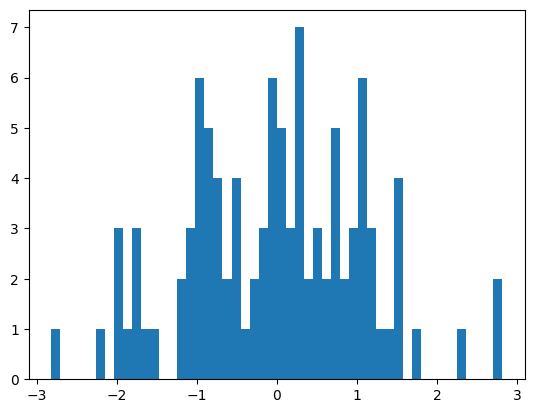

In [7]:
plt.hist(w.data.numpy().flatten(), bins=50)

### Without Regularization

In [8]:
for epoch in range(50):
    logits = x @ w
    exponentials = logits.exp()
    probabilities = exponentials / exponentials.sum(dim=1, keepdim=True)
    loss = -probabilities[range(5), y].log().mean()  # Forcing the weights to be small (Near Zero)
    print("Epoch: {}, Loss: {}".format(epoch, loss))
    w.grad = None
    loss.backward()
    w.data -= 0.01 * w.grad
w

Epoch: 0, Loss: 7.059243679046631
Epoch: 1, Loss: 7.0092363357543945
Epoch: 2, Loss: 6.9594268798828125
Epoch: 3, Loss: 6.909819602966309
Epoch: 4, Loss: 6.860420227050781
Epoch: 5, Loss: 6.8112335205078125
Epoch: 6, Loss: 6.762264251708984
Epoch: 7, Loss: 6.7135186195373535
Epoch: 8, Loss: 6.664999485015869
Epoch: 9, Loss: 6.6167144775390625
Epoch: 10, Loss: 6.56866979598999
Epoch: 11, Loss: 6.52086877822876
Epoch: 12, Loss: 6.473320007324219
Epoch: 13, Loss: 6.426027774810791
Epoch: 14, Loss: 6.378998756408691
Epoch: 15, Loss: 6.332240581512451
Epoch: 16, Loss: 6.285758018493652
Epoch: 17, Loss: 6.239558219909668
Epoch: 18, Loss: 6.193648338317871
Epoch: 19, Loss: 6.148036003112793
Epoch: 20, Loss: 6.102726936340332
Epoch: 21, Loss: 6.0577287673950195
Epoch: 22, Loss: 6.013049125671387
Epoch: 23, Loss: 5.968693733215332
Epoch: 24, Loss: 5.9246721267700195
Epoch: 25, Loss: 5.880990028381348
Epoch: 26, Loss: 5.837655544281006
Epoch: 27, Loss: 5.794676303863525
Epoch: 28, Loss: 5.752058

tensor([[ 0.5088, -2.7929, -1.9826, -2.0378,  1.1377,  0.6963,  0.5544, -0.9168,
          1.2723, -0.9526],
        [ 0.7075,  1.1418, -0.5034,  0.1188,  0.2128, -0.4801, -0.7698,  1.1463,
          0.6670,  0.3184],
        [ 1.4634, -0.7863, -0.5170,  0.3492, -0.1422, -0.1582,  0.0890,  0.1433,
          1.0478, -0.7041],
        [-0.4847, -0.2350,  0.6733,  1.0208,  0.0491, -0.1877,  0.7606,  0.3799,
          0.8330,  0.5280],
        [-1.2260, -0.9192, -0.8367,  0.3884, -1.8952, -0.0521, -2.2117, -0.8295,
          0.8218, -0.8613],
        [ 0.2408, -0.0068,  0.4094,  1.2506,  1.1769,  0.9068, -1.4097,  0.2106,
         -0.7672, -0.2357],
        [-0.7275, -1.5497,  0.1455,  0.3606, -1.2871,  0.3343,  1.4293, -1.6574,
         -1.0033, -0.4977],
        [ 2.8080, -1.1317, -0.9907, -0.0464,  0.5043, -0.7114,  1.4038,  2.7344,
         -1.9108, -0.9057],
        [-0.0048, -1.6116,  1.5182, -0.3220,  1.1563, -0.4341,  0.9249,  0.1745,
          1.6774, -0.0820],
        [ 2.3117, -

(array([1., 0., 0., 0., 0., 1., 1., 2., 1., 0., 3., 1., 1., 2., 1., 1., 5.,
        5., 5., 2., 5., 1., 4., 4., 5., 3., 5., 3., 5., 4., 3., 3., 2., 3.,
        2., 5., 2., 3., 1., 2., 0., 0., 0., 0., 0., 1., 0., 0., 0., 2.]),
 array([-2.7928741 , -2.68085599, -2.56883764, -2.45681953, -2.34480143,
        -2.23278332, -2.12076497, -2.00874686, -1.89672875, -1.78471053,
        -1.6726923 , -1.56067419, -1.44865596, -1.33663785, -1.22461963,
        -1.11260152, -1.00058329, -0.88856512, -0.77654696, -0.66452879,
        -0.55251062, -0.44049242, -0.32847425, -0.21645607, -0.1044379 ,
         0.00758028,  0.11959846,  0.23161663,  0.34363481,  0.45565298,
         0.56767118,  0.67968935,  0.79170752,  0.90372568,  1.01574385,
         1.12776208,  1.23978019,  1.35179842,  1.46381652,  1.57583475,
         1.68785286,  1.79987109,  1.91188931,  2.02390742,  2.13592553,
         2.24794388,  2.35996199,  2.47198009,  2.5839982 ,  2.69601655,
         2.80803466]),
 <BarContainer object

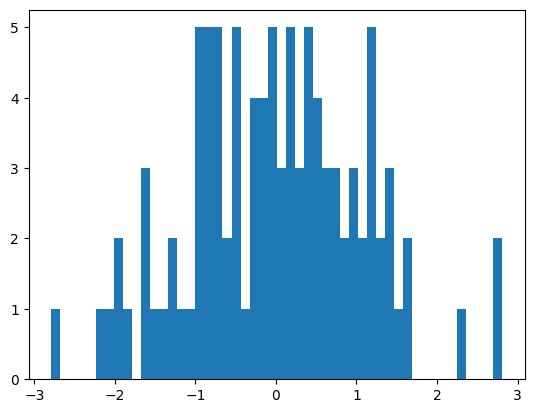

In [9]:
plt.hist(w.data.numpy().flatten(), bins=50)

### With Regularization

In [16]:
for epoch in range(50):
    logits = x @ w
    exponentials = logits.exp()
    probabilities = exponentials / exponentials.sum(dim=1, keepdim=True)
    loss = -probabilities[range(5), y].log().mean() + (w**2).sum() # Forcing the weights to be small (Near Zero)
    print("Epoch: {}, Loss: {}".format(epoch, loss))
    w.grad = None
    loss.backward()
    w.data -= 0.01 * w.grad
w

Epoch: 0, Loss: 126.49819946289062
Epoch: 1, Loss: 121.4674072265625
Epoch: 2, Loss: 116.63776397705078
Epoch: 3, Loss: 112.0013656616211
Epoch: 4, Loss: 107.55060577392578
Epoch: 5, Loss: 103.27821350097656
Epoch: 6, Loss: 99.17717742919922
Epoch: 7, Loss: 95.24075317382812
Epoch: 8, Loss: 91.46248626708984
Epoch: 9, Loss: 87.83612823486328
Epoch: 10, Loss: 84.35568237304688
Epoch: 11, Loss: 81.01541137695312
Epoch: 12, Loss: 77.80977630615234
Epoch: 13, Loss: 74.7334213256836
Epoch: 14, Loss: 71.78125
Epoch: 15, Loss: 68.94830322265625
Epoch: 16, Loss: 66.2298583984375
Epoch: 17, Loss: 63.62135314941406
Epoch: 18, Loss: 61.118377685546875
Epoch: 19, Loss: 58.71673583984375
Epoch: 20, Loss: 56.412353515625
Epoch: 21, Loss: 54.20133590698242
Epoch: 22, Loss: 52.07992172241211
Epoch: 23, Loss: 50.04450988769531
Epoch: 24, Loss: 48.09162902832031
Epoch: 25, Loss: 46.21794128417969
Epoch: 26, Loss: 44.420265197753906
Epoch: 27, Loss: 42.69550704956055
Epoch: 28, Loss: 41.040714263916016
E

tensor([[ 0.1784, -1.0196, -0.7248, -0.7489,  0.4170,  0.2455,  0.2603, -0.3328,
          0.4325, -0.3509],
        [ 0.2597,  0.4167, -0.1835,  0.0442,  0.0732, -0.1755, -0.2753,  0.4298,
          0.2262,  0.1166],
        [ 0.5380, -0.2708, -0.1745,  0.1409, -0.0742, -0.0408,  0.0169,  0.0114,
          0.3723, -0.2334],
        [-0.1814, -0.0877,  0.2429,  0.3645,  0.0232, -0.0731,  0.2736,  0.1552,
          0.3094,  0.1889],
        [-0.4449, -0.3245, -0.2961,  0.1454, -0.6935, -0.0139, -0.8074, -0.2906,
          0.2492, -0.2993],
        [ 0.0740, -0.0081,  0.1393,  0.4356,  0.4123,  0.3140, -0.4622,  0.1128,
         -0.2748, -0.0963],
        [-0.2748, -0.5638,  0.0440,  0.1171, -0.5323,  0.1093,  0.6089, -0.5802,
         -0.3653, -0.1845],
        [ 1.0225, -0.4008, -0.3523, -0.0129,  0.1606, -0.2492,  0.4889,  0.9811,
         -0.6854, -0.3137],
        [-0.0027, -0.5830,  0.5538, -0.1206,  0.4113, -0.1609,  0.3462,  0.0958,
          0.5771, -0.0257],
        [ 0.8323, -

(array([1., 0., 0., 0., 0., 1., 1., 2., 1., 0., 3., 2., 0., 1., 1., 1., 4.,
        5., 7., 2., 5., 1., 4., 4., 5., 3., 4., 5., 5., 2., 4., 4., 2., 3.,
        1., 7., 1., 0., 2., 3., 0., 0., 0., 0., 0., 1., 0., 0., 1., 1.]),
 array([-1.01960921, -0.9787668 , -0.93792433, -0.89708191, -0.85623944,
        -0.81539702, -0.77455455, -0.73371214, -0.69286966, -0.65202725,
        -0.61118478, -0.57034236, -0.52949989, -0.48865747, -0.44781503,
        -0.40697259, -0.36613014, -0.3252877 , -0.28444526, -0.24360281,
        -0.20276037, -0.16191792, -0.12107548, -0.08023304, -0.03939059,
         0.00145185,  0.04229429,  0.08313674,  0.12397918,  0.16482162,
         0.20566407,  0.24650651,  0.28734896,  0.3281914 ,  0.36903384,
         0.40987629,  0.45071873,  0.49156117,  0.53240359,  0.57324606,
         0.61408848,  0.65493095,  0.69577336,  0.73661584,  0.77745825,
         0.81830072,  0.85914314,  0.89998561,  0.94082803,  0.9816705 ,
         1.02251291]),
 <BarContainer object

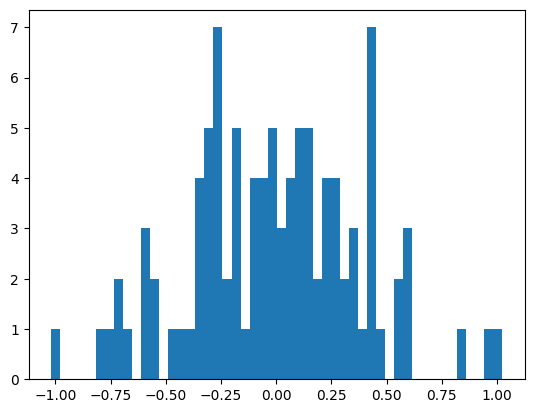

In [17]:
plt.hist(w.data.numpy().flatten(), bins=50)